## 베이지안 최적화

- gaussian process를 사용한 bayesian global optimization library
- 최대한 적은 iteration으로 최대값을 구하는 것이 목표

### 원리
- 최적화하려는 함수를 가장 살 설명하는 함수의 사후 분포(가우시안 프로세스)를 구성해 작동
    - 관측치가 많아지면 사후 분포가 개선되고 파라미터 공간에서 탐색할 가치가 있는 영역과 그렇지 않은 영역이 더 명확해짐
<img src="https://github.com/fmfn/BayesianOptimization/raw/master/examples/bo_example.png">

- 반복하면서 알고리즘은 target function에 대해 알고있던 것을 고려해 exploration과 exploitation을 조화시킴
    - 각 단계에서 가우스 프로세스는 알려진 샘플에 fit되고 사후 분포는 탐사 전략(UCB), 또는 EI과 결합됨

<img src="https://github.com/fmfn/BayesianOptimization/raw/master/examples/bayesian_optimization.gif">

- 이 프로세스는 최적의 조합의 파라미터 조합을 찾는데 필요한 단계 수를 최소화 함
    - 최적화할 함수를 샘플링하는 것이 매우 어려울 경우 적합

In [1]:
!pip3 install bayesian-optimization

  Running setup.py bdist_wheel for bayesian-optimization ... done
  Stored in directory: /Users/byeon/Library/Caches/pip/wheels/4b/60/a2/6eec4adc73341c1a2a653022b99ff8e1cb090684dba83be683
Successfully built bayesian-optimization
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 1. 최적화할 함수 정의

In [2]:
def black_box_function(x, y):
    return -x ** 2 - (y - 1) ** 2 + 1

### 2. 최적화 시작

In [4]:
from bayes_opt import BayesianOptimization

In [6]:
# 파라미터 경계 정의
pbounds = {'x': (2, 4), 'y': (-3, 3)}

In [7]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

- `n_iter` : 수행하려는 베이지안 최적화 단계. 더 많은 단계를 거치면 더 좋은 최대치 얻음
- `init_points` : 수행할 무작위 탐색 단계

In [8]:
optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -7.135    |  2.834    |  1.322    |
|  2        | -7.78     |  2.0      | -1.186    |
|  3        | -19.0     |  4.0      |  3.0      |
|  4        | -16.3     |  2.378    | -2.413    |
|  5        | -4.441    |  2.105    | -0.005822 |


In [9]:
optimizer.maximize(
    init_points=10,
    n_iter=3,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  6        | -16.13    |  2.294    | -2.446    |
|  7        | -8.341    |  2.373    | -0.9266   |
|  8        | -7.392    |  2.794    |  0.2329   |
|  9        | -7.069    |  2.838    |  1.111    |
|  10       | -6.412    |  2.409    |  2.269    |
|  11       | -3.223    |  2.055    |  1.023    |
|  12       | -7.455    |  2.835    |  0.3521   |
|  13       | -12.11    |  2.281    | -1.811    |
|  14       | -15.25    |  3.601    |  2.81     |
|  15       | -5.924    |  2.627    |  1.154    |
|  16       | -3.163    |  2.01     |  0.6509   |
|  17       | -3.664    |  2.151    |  0.8086   |
|  18       | -3.372    |  2.0      |  0.3903   |


In [10]:
optimizer.maximize(
    init_points=2,
    n_iter=9,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  19       | -14.95    |  3.753    |  2.368    |
|  20       | -17.89    |  2.17     | -2.766    |
|  21       | -3.015    |  2.0      |  0.8775   |
|  22       | -3.043    |  2.0      |  1.207    |
|  23       | -3.233    |  2.0      |  1.482    |
|  24       | -3.001    |  2.0      |  1.03     |
|  25       | -3.002    |  2.0      |  0.959    |
|  26       | -3.011    |  2.0      |  1.104    |
|  27       | -3.0      |  2.0      |  0.9955   |
|  28       | -3.0      |  2.0      |  0.9976   |
|  29       | -3.0      |  2.0      |  1.003    |


- 최상의 조합은 `optimizer.max`로 확인 가능

In [11]:
print(optimizer.max)

{'target': -3.0000057448244, 'params': {'x': 2.0, 'y': 0.9976031636685325}}


### 2.1 범위 수정

In [12]:
optimizer.set_bounds(new_bounds={"x": (-2, 3)})

In [13]:
optimizer.maximize(
    init_points=0,
    n_iter=5,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  30       | -1.313    |  1.52     |  0.9647   |
|  31       | -0.7752   |  1.307    |  0.739    |
|  32       | -0.2191   |  1.1      |  0.9021   |
|  33       |  0.2006   |  0.8713   |  0.7994   |
|  34       |  0.5277   |  0.6862   |  0.963    |


### 3. 최적화 가이드
- 파라미터 공간에 아이디어가 있는 경우
    - probe(탐색)
    - 기본적으로 lazy=True로 탐색
    - 다음에 maximize를 호출할 때 평가함
- 파라미터를 딕셔너리로 넘길 수 있음

In [14]:
optimizer.probe(
    params={"x": 0.5, "y": 0.7},
    lazy=True,
)

In [15]:
print(optimizer.space.keys)

['x', 'y']


In [16]:
optimizer.probe(
    params=[-0.3, 0.1],
    lazy=True,
)

In [17]:
optimizer.maximize(init_points=0, n_iter=0)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  35       |  0.66     |  0.5      |  0.7      |
|  36       |  0.1      | -0.3      |  0.1      |


### 4. 저장, 로딩, 재시작
- BayesianOptimization 객체를 인스턴스화할 때 verbose>0으로 최적화 진행 상황 확인 가능
    - 로깅, 경고 기능을 더 많이 사용하려면 observer를 사용해야 함
    - advanced tour notebook 참고
- 여기선 네이티브 JSONLogger 객체를 사용해 파일에 저장하고 진행 상황 로드하는 것을 알려줌

### 4.1 Saving progress

In [19]:
from bayes_opt.observer import JSONLogger
from bayes_opt.event import Events

In [20]:
logger = JSONLogger(path="./bayesian_logs.json")
optimizer.subscribe(Events.OPTMIZATION_STEP, logger)

In [21]:
optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  37       | -1.934    | -1.151    |  2.269    |
|  38       | -3.446    | -1.508    | -0.4734   |
|  39       |  0.9496   | -0.1135   |  0.8064   |
|  40       |  0.975    |  0.1083   |  1.115    |
|  41       |  0.955    |  0.1557   |  0.8559   |


### 4.2 Loading progress

In [22]:
from bayes_opt.util import load_logs

In [23]:
new_optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={"x": (-2, 2), "y": (-2, 2)},
    verbose=2,
    random_state=7,
)
print(len(new_optimizer.space))

0


In [24]:
load_logs(new_optimizer, logs=["./bayesian_logs.json"]);

In [25]:
print("New optimizer is now aware of {} points.".format(len(new_optimizer.space)))

New optimizer is now aware of 5 points.


In [26]:
new_optimizer.maximize(
    init_points=0,
    n_iter=10,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -0.3124   |  1.058    |  1.44     |
|  2        | -1.096    |  0.883    | -0.1472   |
|  3        | -12.0     |  2.0      | -2.0      |
|  4        |  0.8003   | -0.3897   |  1.219    |
|  5        |  0.4281   |  0.07665  |  1.752    |
|  6        |  0.5589   |  0.0956   |  0.3428   |
|  7        |  0.5132   |  0.6376   |  0.7168   |
|  8        |  0.9673   | -0.1194   |  1.136    |
|  9        |  0.7069   | -0.515    |  0.833    |
|  10       |  0.9992   | -0.01816  |  0.9794   |


## Advanced Part
- 사실 `maximize`는 `suggest`, `probe`, `register`의 wrapper임
    - 최적화 루프를 더 잘 쓰고싶으면 위 3개를 알아야 함

In [27]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
)

- UtilityFUnction 인스턴스 필요

In [28]:
from bayes_opt import UtilityFunction

utility = UtilityFunction(kind="ucb", kappa=2.5, xi=0.0)

- `suggest`는 언제나 호출할 수 있음
- 아래 코드를 실행할 때마다 다른 값이 나옴

In [32]:
next_point_to_probe = optimizer.suggest(utility)
print("Next point to probe is:", next_point_to_probe)

Next point to probe is: {'x': -1.2549591544893164, 'y': -0.9266356377417138}


- 평가

In [33]:
target = black_box_function(**next_point_to_probe)
print("Found the target value to be:", target)

Found the target value to be: -4.28684736005296


- 어떤 값이 관측되었는지 알려주기

In [34]:
optimizer.register(
    params=next_point_to_probe,
    target=target,
)

### 1.1 maximize loop

In [35]:
for _ in range(5):
    next_point = optimizer.suggest(utility)
    target = black_box_function(**next_point)
    optimizer.register(params=next_point, target=target)
    
    print(target, next_point)
print(optimizer.max)

-7.0 {'x': 2.0, 'y': 3.0}
-12.194801029414048 {'x': -1.2447710918286998, 'y': -2.412527795983739}
-3.21817680880895 {'x': -1.7906698960118255, 'y': -0.005822117636089974}
-3.2731892101523767 {'x': -1.566632659885181, 'y': -0.3486479596742286}
-1.7032222494368776 {'x': -1.3426387056366216, 'y': 0.05103026625540113}
{'target': -1.7032222494368776, 'params': {'x': -1.3426387056366216, 'y': 0.05103026625540113}}


### 2. Discrete 파라미터 다루기

In [36]:
def func_with_discrete_params(x, y, d):
    # Simulate necessity of having d being discrete.
    assert type(d) == int
    
    return ((x + y + d) // (1 + d)) / (1 + (x + y) ** 2)

In [37]:
def function_to_be_optimized(x, y, w):
    d = int(w)
    return func_with_discrete_params(x, y, d)

In [38]:
optimizer = BayesianOptimization(
    f=function_to_be_optimized,
    pbounds={'x': (-10, 10), 'y': (-10, 10), 'w': (0, 5)},
    verbose=2,
    random_state=1,
)

In [39]:
optimizer.maximize(alpha=1e-3)

|   iter    |  target   |     w     |     x     |     y     |
-------------------------------------------------------------
|  1        | -0.06199  |  2.085    |  4.406    | -9.998    |
|  2        | -0.0344   |  1.512    | -7.065    | -8.153    |
|  3        | -0.2177   |  0.9313   | -3.089    | -2.065    |
|  4        |  0.1865   |  2.694    | -1.616    |  3.704    |
|  5        | -0.2187   |  1.022    |  7.562    | -9.452    |
|  6        |  0.009975 |  5.0      |  10.0     |  10.0     |
|  7        |  0.0      |  5.0      | -10.0     |  10.0     |
|  8        |  0.09003  |  0.0      |  0.4916   |  10.0     |
|  9        | -0.007481 |  5.0      | -10.0     | -10.0     |
|  10       |  0.01989  |  5.0      | -0.02203  |  10.0     |
|  11       |  0.0189   |  5.0      |  10.0     |  0.238    |
|  12       | -0.2149   |  0.0      | -10.0     |  5.282    |
|  13       |  0.05995  |  0.0      |  10.0     |  5.786    |
|  14       | -0.01299  |  5.0      | -2.367    | -10.0     |
|  15   

### 3.1 파라미터를 GP로 전달

In [40]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
)
optimizer.maximize(
    init_points=1,
    n_iter=5,
    # What follows are GP regressor parameters
    alpha=1e-3,
    n_restarts_optimizer=5
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.7862   | -0.3319   |  1.322    |
|  2        | -18.96    |  1.993    | -2.998    |
|  3        |  0.7858   | -0.3333   |  1.321    |
|  4        |  0.5787   | -0.429    |  1.487    |
|  5        |  0.7798   |  0.02543  |  1.469    |
|  6        |  0.9779   |  0.1301   |  0.9282   |


- maximize를 여러번 호출하거나 optimizing을 최대화 밖에서 할 경우엔 `set_gp_params`

In [41]:
optimizer.set_gp_params(normalize_y=True)

### Observer 계속!
- 이벤트가 시작되면 콜백 함수가 이벤트와 함께 호출되고 BayesianOptimization 인스턴스가 매개 변수로 전달

In [43]:
from bayes_opt.event import DEFAULT_EVENTS, Events

In [44]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={'x': (-2, 2), 'y': (-3, 3)},
    verbose=2,
    random_state=1,
)

In [45]:
class BasicObserver:
    def update(self, event, instance):
        """Does whatever you want with the event and `BayesianOptimization` instance."""
        print("Event `{}` was observed".format(event))

In [46]:
my_observer = BasicObserver()

optimizer.subscribe(
    event=Events.OPTMIZATION_STEP,
    subscriber=my_observer,
    callback=None, # Will use the `update` method as callback
)

In [47]:
def my_callback(event, instance):
    print("Go nuts here!")

optimizer.subscribe(
    event=Events.OPTMIZATION_START,
    subscriber="Any hashable object",
    callback=my_callback,
)

In [48]:
optimizer.maximize(init_points=1, n_iter=2)


Go nuts here!
Event `optmization:step` was observed
Event `optmization:step` was observed
Event `optmization:step` was observed


In [49]:
DEFAULT_EVENTS


['optmization:start', 'optmization:step', 'optmization:end']

## 시각화

In [50]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline


<img src="https://render.githubusercontent.com/render/math?math=f%28x%29%20%3D%20e%5E%7B-%28x%20-%202%29%5E2%7D%20%2B%20e%5E%7B-%5Cfrac%7B%28x%20-%206%29%5E2%7D%7B10%7D%7D%20%2B%20%5Cfrac%7B1%7D%7Bx%5E2%20%2B%201%7D%2C&mode=display">

In [51]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

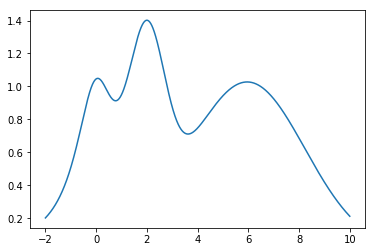

In [52]:
x = np.linspace(-2, 10, 10000).reshape(-1, 1)
y = target(x)

plt.plot(x, y);

In [53]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state=27)

In [54]:
optimizer.maximize(init_points=2, n_iter=0, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8198   |  3.109    |
|  2        |  0.746    |  7.775    |


In [55]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

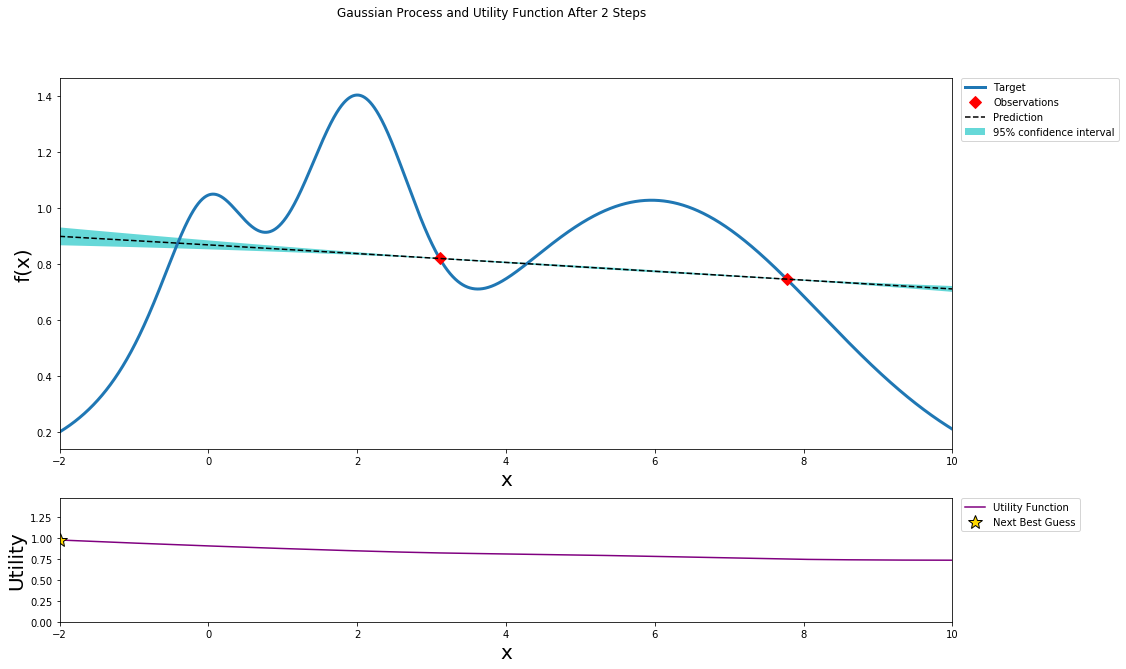

In [56]:
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  3        |  0.2017   | -2.0      |


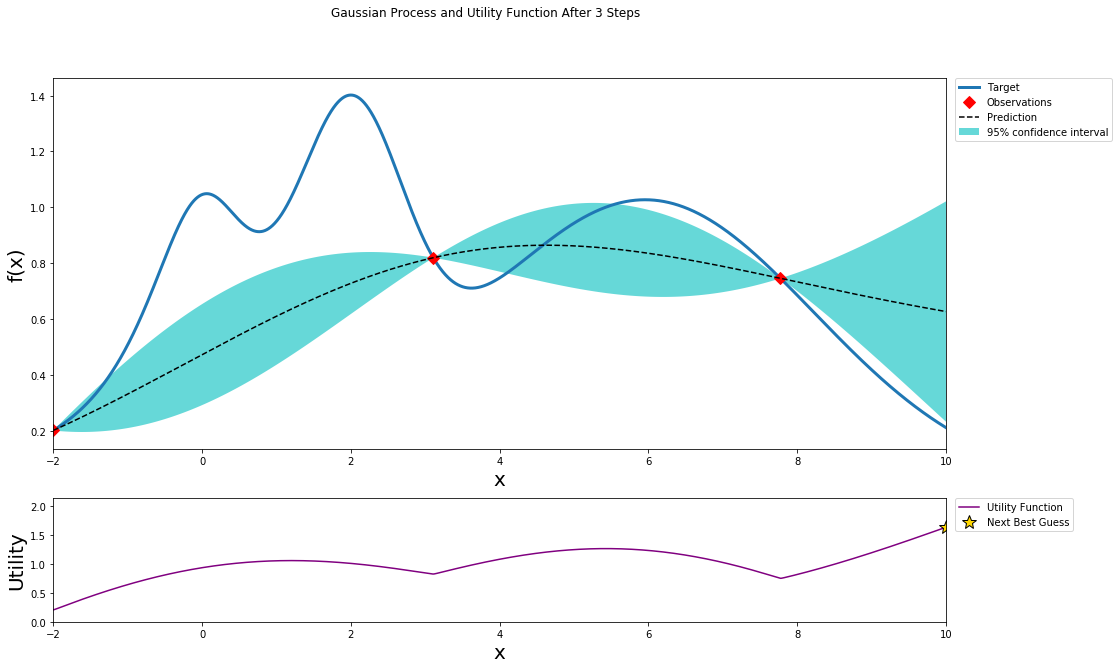

In [57]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  4        |  0.2118   |  10.0     |


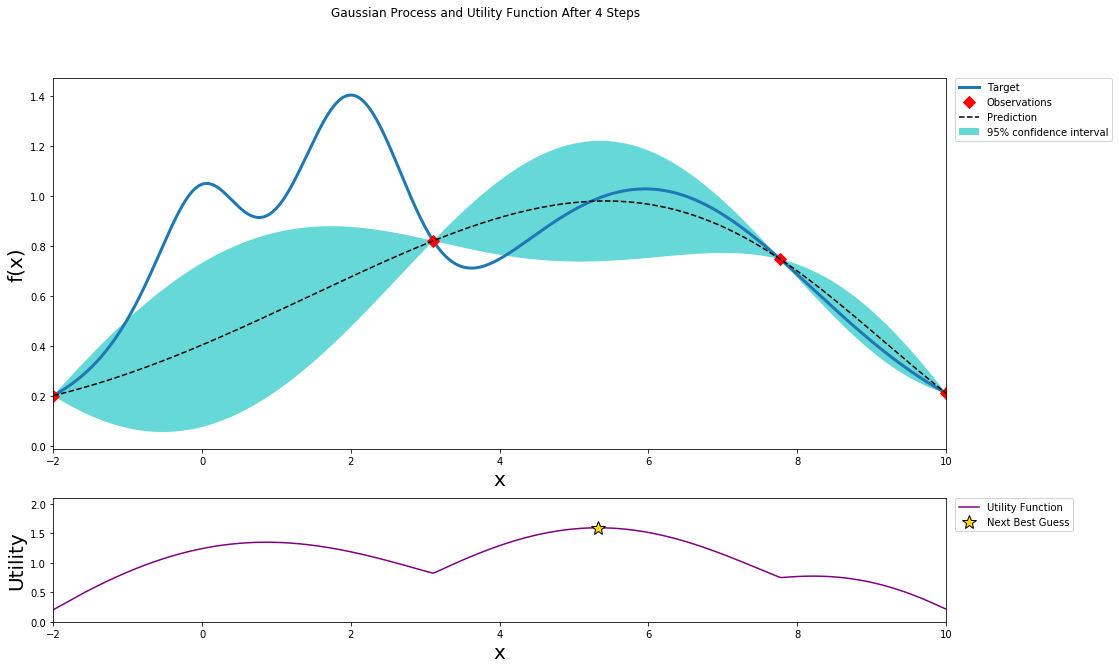

In [58]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  5        |  0.9898   |  5.327    |


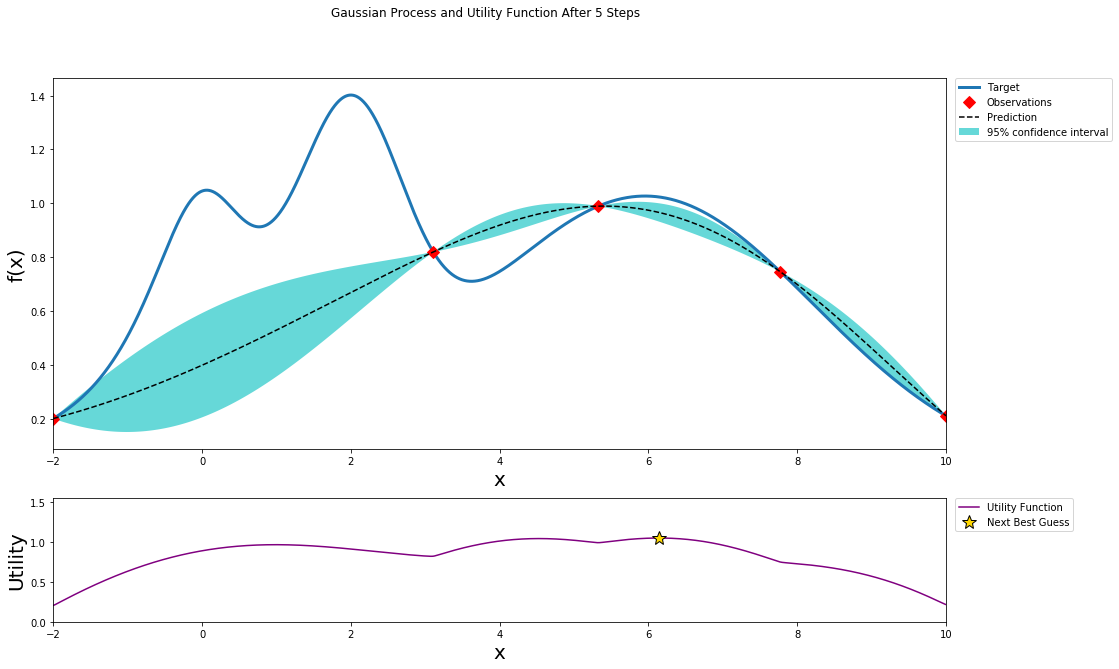

In [59]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  6        |  1.024    |  6.141    |


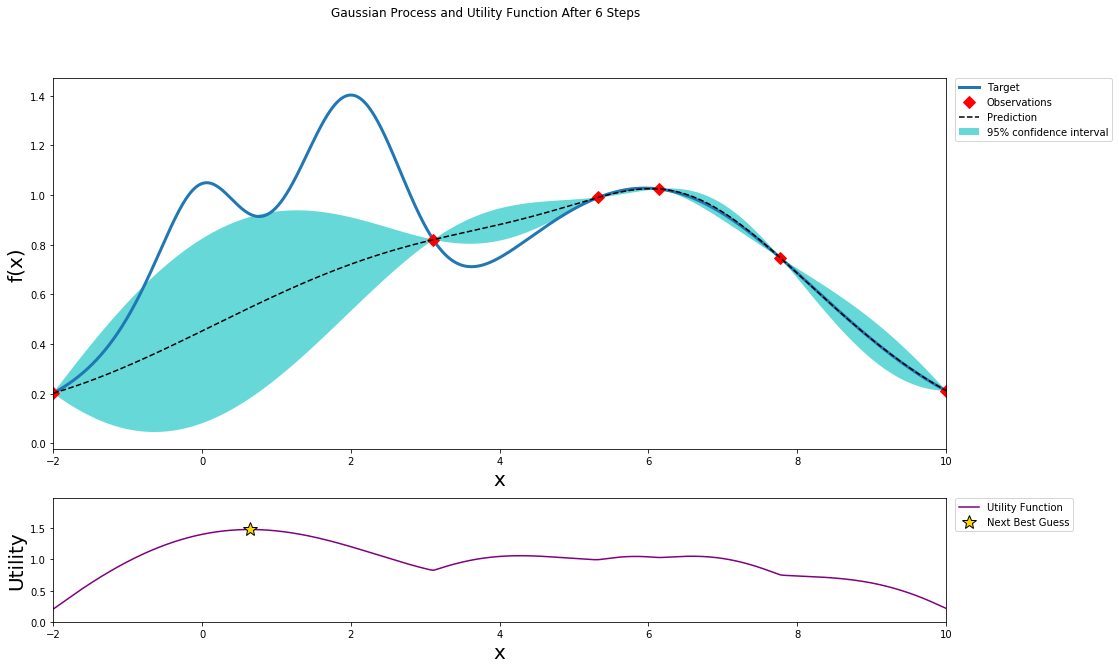

In [60]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  7        |  0.9227   |  0.6438   |


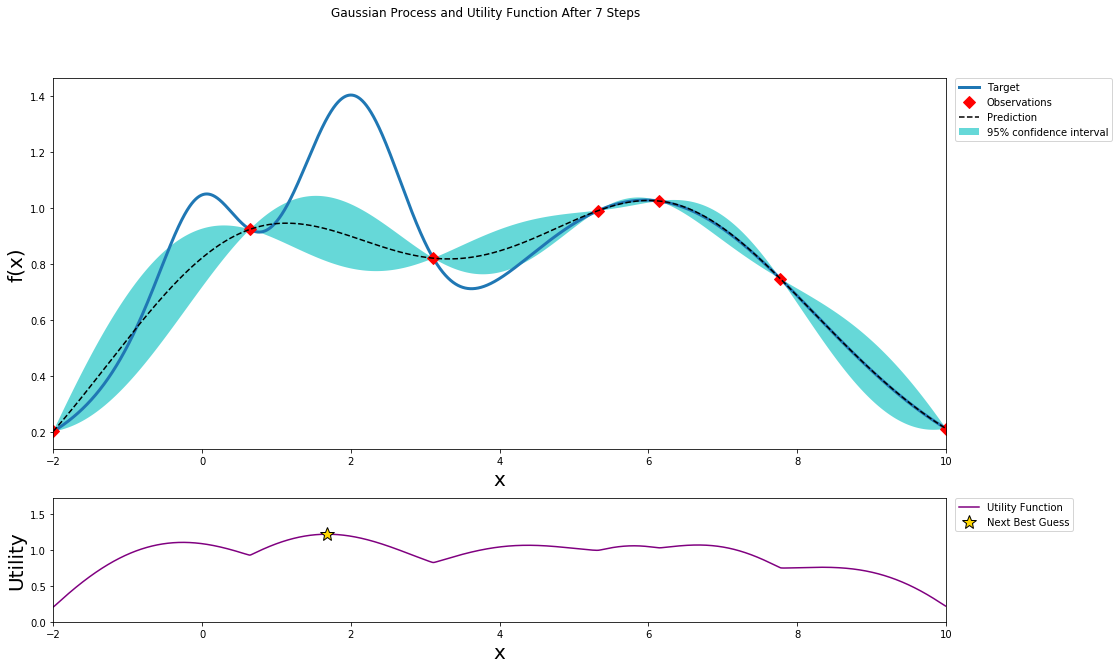

In [61]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  8        |  1.32     |  1.682    |


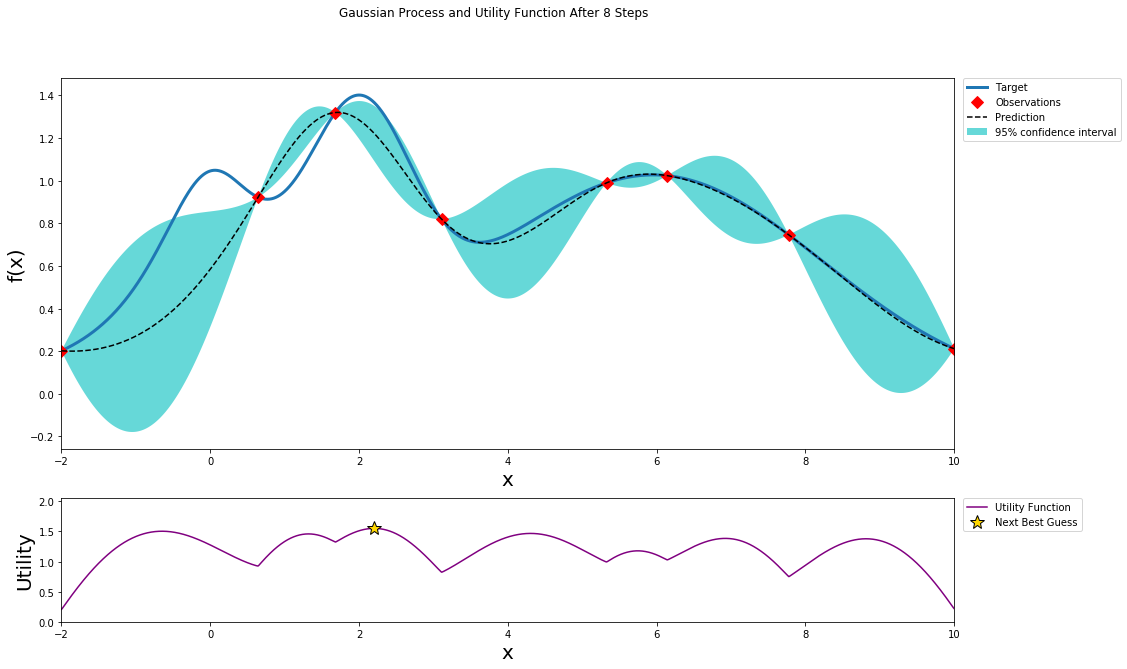

In [62]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  9        |  1.367    |  2.203    |


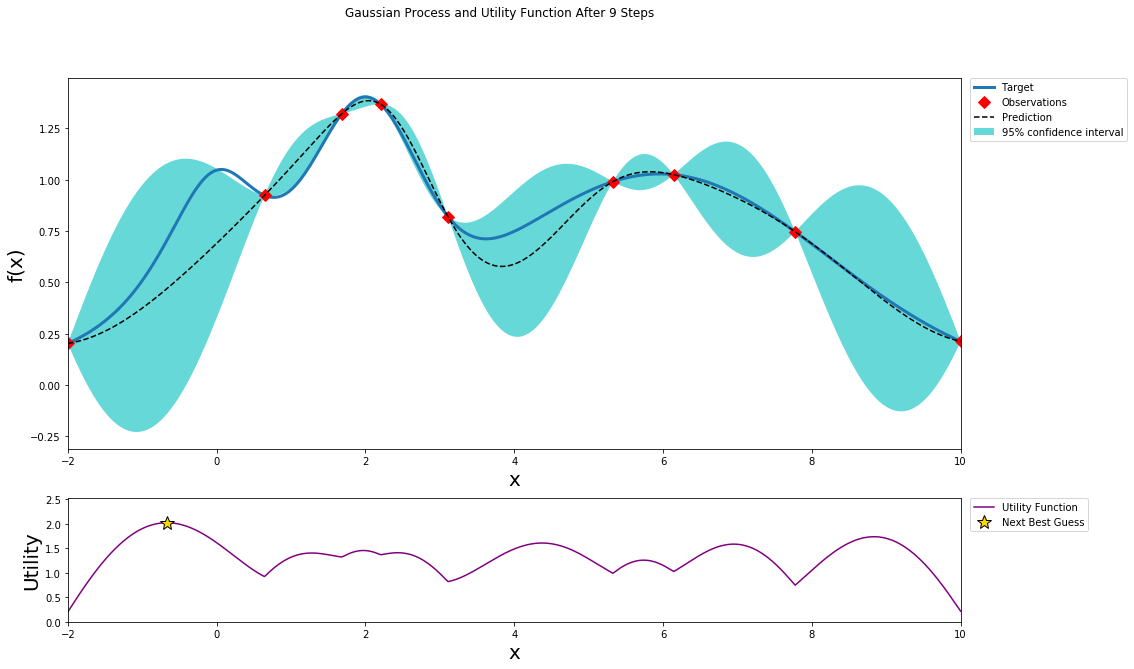

In [63]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

## sklearn_example.py

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC

from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

def get_data():
    """Synthetic binary classification dataset."""
    data, targets = make_classification(
        n_samples=1000,
        n_features=45,
        n_informative=12,
        n_redundant=7,
        random_state=134985745,
    )
    return data, targets


def svc_cv(C, gamma, data, targets):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    estimator = SVC(C=C, gamma=gamma, random_state=2)
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=4)
    return cval.mean()


def rfc_cv(n_estimators, min_samples_split, max_features, data, targets):
    """Random Forest cross validation.
    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_features. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.
    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_features that minimzes the log loss.
    """
    estimator = RFC(
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=2
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='neg_log_loss', cv=4)
    return cval.mean()


def optimize_svc(data, targets):
    """Apply Bayesian Optimization to SVC parameters."""
    def svc_crossval(expC, expGamma):
        """Wrapper of SVC cross validation.
        Notice how we transform between regular and log scale. While this
        is not technically necessary, it greatly improves the performance
        of the optimizer.
        """
        C = 10 ** expC
        gamma = 10 ** expGamma
        return svc_cv(C=C, gamma=gamma, data=data, targets=targets)

    optimizer = BayesianOptimization(
        f=svc_crossval,
        pbounds={"expC": (-3, 2), "expGamma": (-4, -1)},
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)


def optimize_rfc(data, targets):
    """Apply Bayesian Optimization to Random Forest parameters."""
    def rfc_crossval(n_estimators, min_samples_split, max_features):
        """Wrapper of RandomForest cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return rfc_cv(
            n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=max(min(max_features, 0.999), 1e-3),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=rfc_crossval,
        pbounds={
            "n_estimators": (10, 250),
            "min_samples_split": (2, 25),
            "max_features": (0.1, 0.999),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

if __name__ == "__main__":
    data, targets = get_data()

    print(Colours.yellow("--- Optimizing SVM ---"))
    optimize_svc(data, targets)

    print(Colours.green("--- Optimizing Random Forest ---"))
    optimize_rfc(data, targets)

## 분산

In [ ]:
import time
import random

from bayes_opt import BayesianOptimization
from bayes_opt.util import UtilityFunction, Colours

import asyncio
import threading

try:
    import json
    import tornado.ioloop
    import tornado.httpserver
    from tornado.web import RequestHandler
    import requests
except ImportError:
    raise ImportError(
        "In order to run this example you must have the libraries: " +
        "`tornado` and `requests` installed."
    )


def black_box_function(x, y):
    """Function with unknown internals we wish to maximize.
    This is just serving as an example, however, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its outputs values, as unknown.
    """
    time.sleep(random.randint(1, 7))
    return -x ** 2 - (y - 1) ** 2 + 1


class BayesianOptimizationHandler(RequestHandler):
    """Basic functionality for NLP handlers."""
    _bo = BayesianOptimization(
        f=black_box_function,
        pbounds={"x": (-4, 4), "y": (-3, 3)}
    )
    _uf = UtilityFunction(kind="ucb", kappa=3, xi=1)

    def post(self):
        """Deal with incoming requests."""
        body = tornado.escape.json_decode(self.request.body)

        try:
            self._bo.register(
                params=body["params"],
                target=body["target"],
            )
            print("BO has registered: {} points.".format(len(self._bo.space)), end="\n\n")
        except KeyError:
            pass
        finally:
            suggested_params = self._bo.suggest(self._uf)

        self.write(json.dumps(suggested_params))


def run_optimization_app():
    asyncio.set_event_loop(asyncio.new_event_loop())
    handlers = [
        (r"/bayesian_optimization", BayesianOptimizationHandler),
    ]
    server = tornado.httpserver.HTTPServer(
        tornado.web.Application(handlers)
    )
    server.listen(9009)
    tornado.ioloop.IOLoop.instance().start()


def run_optimizer():
    global optimizers_config
    config = optimizers_config.pop()
    name = config["name"]
    colour = config["colour"]

    register_data = {}
    max_target = None
    for _ in range(10):
        status = name + " wants to register: {}.\n".format(register_data)

        resp = requests.post(
            url="http://localhost:9009/bayesian_optimization",
            json=register_data,
        ).json()
        target = black_box_function(**resp)

        register_data = {
            "params": resp,
            "target": target,
        }

        if max_target is None or target > max_target:
            max_target = target

        status += name + " got {} as target.\n".format(target)
        status += name + " will to register next: {}.\n".format(register_data)
        print(colour(status), end="\n")

    global results
    results.append((name, max_target))
    print(colour(name + " is done!"), end="\n\n")


if __name__ == "__main__":
    ioloop = tornado.ioloop.IOLoop.instance()
    optimizers_config = [
        {"name": "optimizer 1", "colour": Colours.red},
        {"name": "optimizer 2", "colour": Colours.green},
        {"name": "optimizer 3", "colour": Colours.blue},
    ]

    app_thread = threading.Thread(target=run_optimization_app)
    app_thread.daemon = True
    app_thread.start()

    targets = (
        run_optimizer,
        run_optimizer,
        run_optimizer
    )
    optimizer_threads = []
    for target in targets:
        optimizer_threads.append(threading.Thread(target=target))
        optimizer_threads[-1].daemon = True
        optimizer_threads[-1].start()

    results = []
    for optimizer_thread in optimizer_threads:
        optimizer_thread.join()

    for result in results:
        print(result[0], "found a maximum value of: {}".format(result[1]))

    ioloop.stop()